# Classifaction MSA Part 2


checking_status: This feature describes the status of the current checking account of the individual. This is a categorical variable with various states such as 'no checking', '<0', '0<=X<200', '>=200'.

duration: This feature is the duration in months of the credit. It is a numerical variable.

credit_history: This categorical feature describes the credit history of the individual such as 'no credits/all paid', 'all credits at this bank paid', 'existing credits paid', 'delay in past', 'critical/other existing credit'.

purpose: This is the purpose for which the credit is taken. It is a categorical feature with possible states such as 'new car', 'used car', 'furniture/equipment', 'radio/television', 'domestic appliance', 'repairs', 'education', 'vacation', 'retraining', 'business', 'other'.

credit_amount: This is a numerical feature representing the credit amount.

savings_status: This categorical feature indicates the status of savings account/bonds like '<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings'.

employment: This feature describes the employment duration. It is categorical and can have values like 'unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'.

installment_commitment: This is the installment rate in percentage of disposable income. It is a numerical variable.

personal_status: This categorical feature describes the personal status and sex, for example 'male divorced/separated', 'female divorced/separated/married', 'male single', 'male married/widowed', 'female single'.

other_parties: This categorical variable indicates if other debtors/guarantors are involved. Possible states are 'none', 'co applicant', 'guarantor'.

residence_since: This numerical feature is the present residence since X number of years.

property_magnitude: This categorical variable describes the property such as 'real estate', 'life insurance', 'car or other', 'unknown/no property'.

age: This is a numerical variable indicating the age of the individual in years.

other_payment_plans: This categorical variable indicates other installment plans such as 'bank', 'stores', 'none'.

housing: This categorical variable indicates the housing situation like 'rent', 'own', 'for free'.

existing_credits: This is a numerical feature showing the number of existing credits at this bank.

job: This categorical variable describes the job situation, such as 'unemployed/unskilled - non-resident', 'unskilled - resident', 'skilled', 'highly skilled'.

num_dependents: This numerical feature shows the number of people being liable to provide maintenance for.

own_telephone: This categorical variable indicates if the individual owns a telephone, 'yes' or 'no'.

foreign_worker: This categorical variable indicates if the individual is a foreign worker, 'yes' or 'no'.

class: This is the target variable you want to predict using the features listed above. It is a categorical variable and it represents whether the credit risk is 'good' or 'bad'.

These are the variables in my dataset. It includes both numerical and categorical data. These features can be used to train a machine learning model to predict the target variable, which in this case is class. This target classifies the credit risk of an individual as either 'good' or 'bad'.

### Importing libaries and removing outliers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix


# Load data
df_credit_risk = pd.read_csv('credit_risk.csv')

def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    mean = numeric_cols.mean()
    std = numeric_cols.std()
    is_outlier = (np.abs(numeric_cols - mean) > 3 * std).any(axis=1)
    return df[~is_outlier]
df_credit_risk = remove_outliers(df_credit_risk)


### setting and spliting the data

In [ ]:

# Identify numeric and categorical columns
numeric_cols = df_credit_risk.select_dtypes(include=[np.number]).columns
categorical_cols = df_credit_risk.select_dtypes(include=['object']).columns

# Handle missing values
for col in numeric_cols:
    df_credit_risk[col].fillna(df_credit_risk[col].mean(), inplace=True)

for col in categorical_cols:
    df_credit_risk[col].fillna(df_credit_risk[col].mode()[0], inplace=True)

# Perform label encoding for target variable and one hot encoding for other categorical variables
le = LabelEncoder()
df_credit_risk['class'] = le.fit_transform(df_credit_risk['class'])

one_hot_encoder = OneHotEncoder(drop='first')
ct = ColumnTransformer(transformers=[('encoder', one_hot_encoder, categorical_cols)], remainder='passthrough')
df_credit_risk = np.array(ct.fit_transform(df_credit_risk))

# Define features and target
X = df_credit_risk[:, :-1] # All columns except last are features
y = df_credit_risk[:, -1]  # Last column is the target

# Imputation
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=0)

Identifying Columns: The code separates the dataset's numeric and categorical columns.
Handling Missing Values: Numeric missing values are filled with the mean of each column, while categorical missing values are filled with the most common value.
Encoding: The target variable ('class') is label encoded to transform it into numerical format. Categorical features are one-hot encoded to be used effectively by the machine learning algorithms.
Defining Features and Target: The 'class' column is defined as the target, and all other columns as features.
Imputation: Any remaining missing values in the features are handled.
Feature Scaling: The features are standardized to have a mean of 0 and a variance of 1.
Splitting the Dataset: The dataset is split into a training set (65%) and a test set (35%).
This preprocessed data can now be used to train machine learning models.

I picked Gradient Boosting Classifier (GBC) as it is a type of machine learning algorithm that combines multiple weak models to create a strong predictive model. It's great for classification tasks because:

Performance: It often provides excellent accuracy.
Flexibility: It handles different types of data and complex relationships.
Robustness: It's resistant to irrelevant features and outliers.
Tuning: It has many settings for optimization.
Handling Missing Values: It can manage missing data automatically.
Probabilistic Outputs: It can output class probabilities, not just labels.
However, it can be computationally intensive and requires careful parameter tuning to avoid overfitting.

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Define a range of seeds
seeds = range(10)

# Initialize a list to store the accuracy for each seed
accuracy_scores = []

# Loop over the seeds
for seed in seeds:

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=seed)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 4, 5]
    }

    # Create a GradientBoostingClassifier model
    model = GradientBoostingClassifier()

    # Perform grid search to find the best hyperparameter
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model with the best hyperparameter
    best_model = grid_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Get accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracy_scores.append(accuracy)
    print('Accuracy Score:', accuracy)
    
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(seeds, accuracy_scores, marker='o', linestyle='', label='Data Points')

# Calculate coefficients for the polynomial fit (line of best fit)
m, b = np.polyfit(seeds, accuracy_scores, 1)

# Add line of best fit
plt.plot(seeds, m*np.array(seeds) + b, linestyle='-', color='red', label='Line of Best Fit')

plt.title('Model Accuracy for Different Random Seeds')
plt.xlabel('Seed')
plt.ylabel('Accuracy')

# Adding legend
plt.legend()
plt.show()
    
    # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

sets up some options (like how fast the model learns, how detailed it is, and how many mini-models it includes).
It then sets up a range of 'seeds'. Seeds are like initial kick-starters that can affect how the model learns.
For each seed, it does the following:
It splits the data into two groups: one for training the model and one for testing its accuracy.
It creates a basic model for making predictions.
Then it tries out all combinations of the options set earlier on the training data, and selects the one that performs the best. This is known as hyperparameter tuning and is done through a process called Grid Search.
It uses the best version of the model to make predictions on the test data.
It then calculates the accuracy of these predictions (how many it got right).
Finally, it keeps a record of this accuracy.
By the end of this process, you have a list of accuracy scores, one for each seed. This tells you how well the model, with the best combination of parameters, performed for each different starting seed.

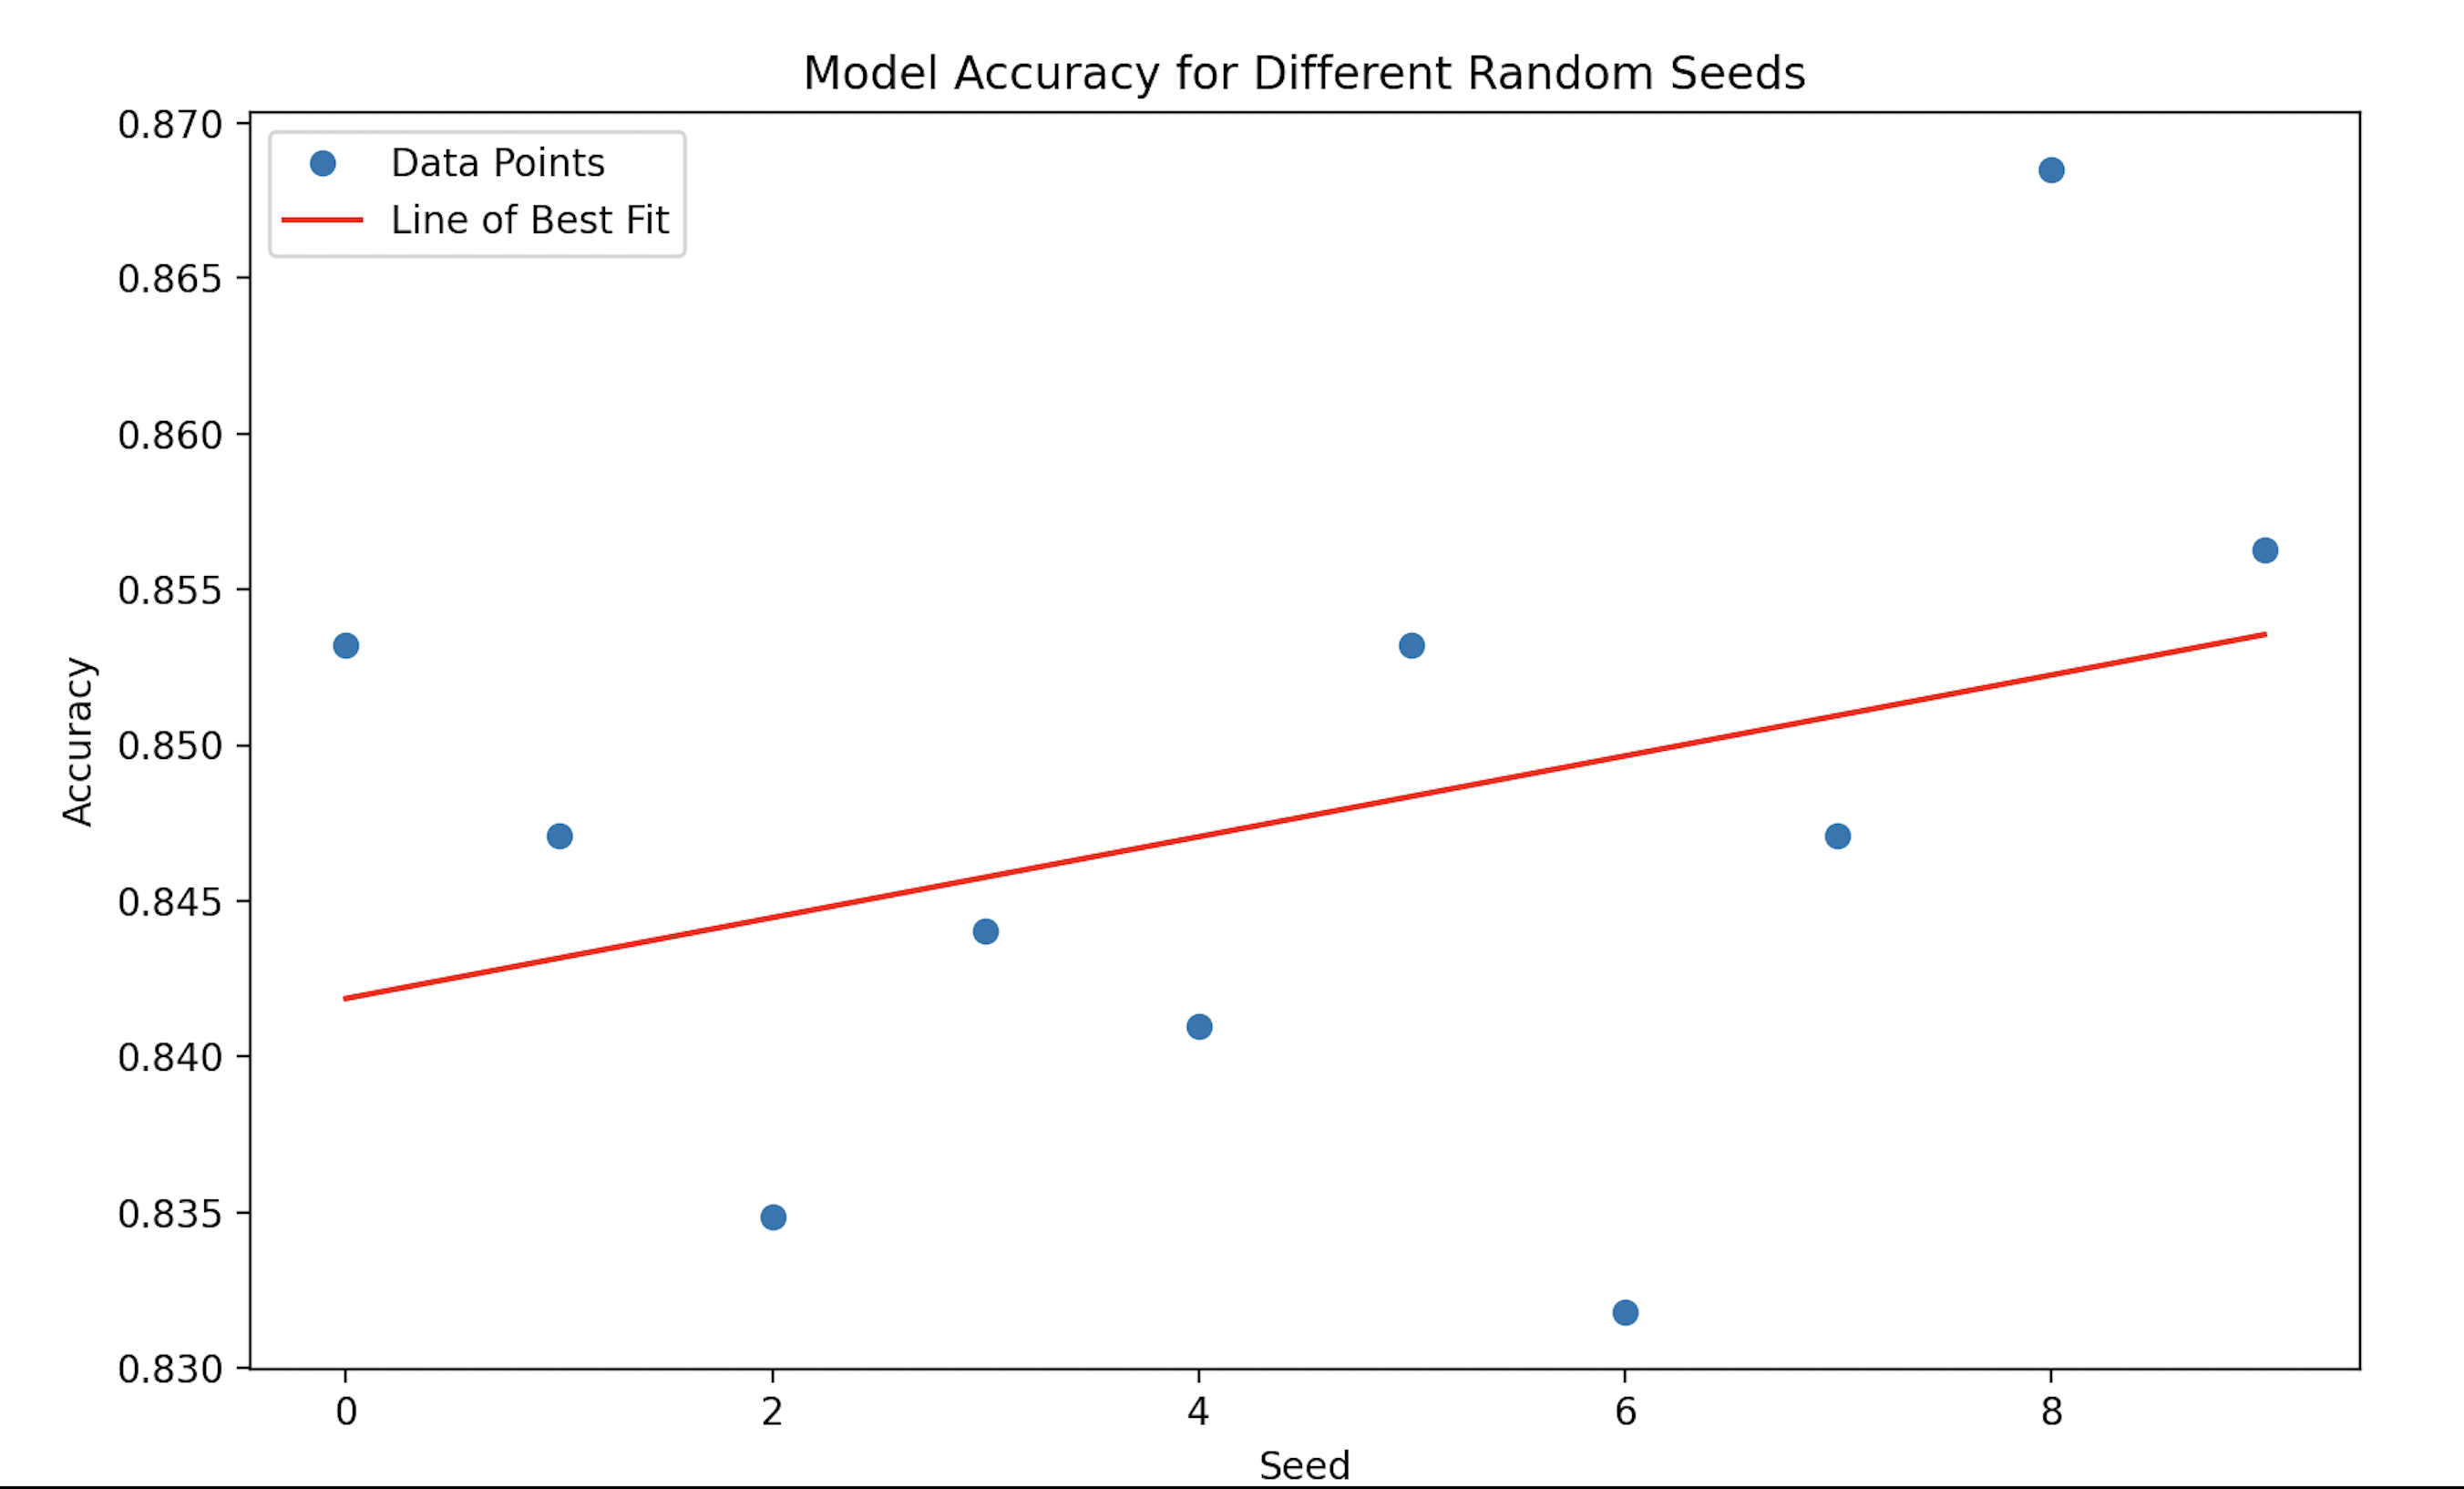

As we can see the model has a range of an 83%-87% accuracy with the line of best fit falling into the range of 84%-85.5% of the accuracy which is good considering it is hard to predict the good or bad credit as most of the variables favour good credit.
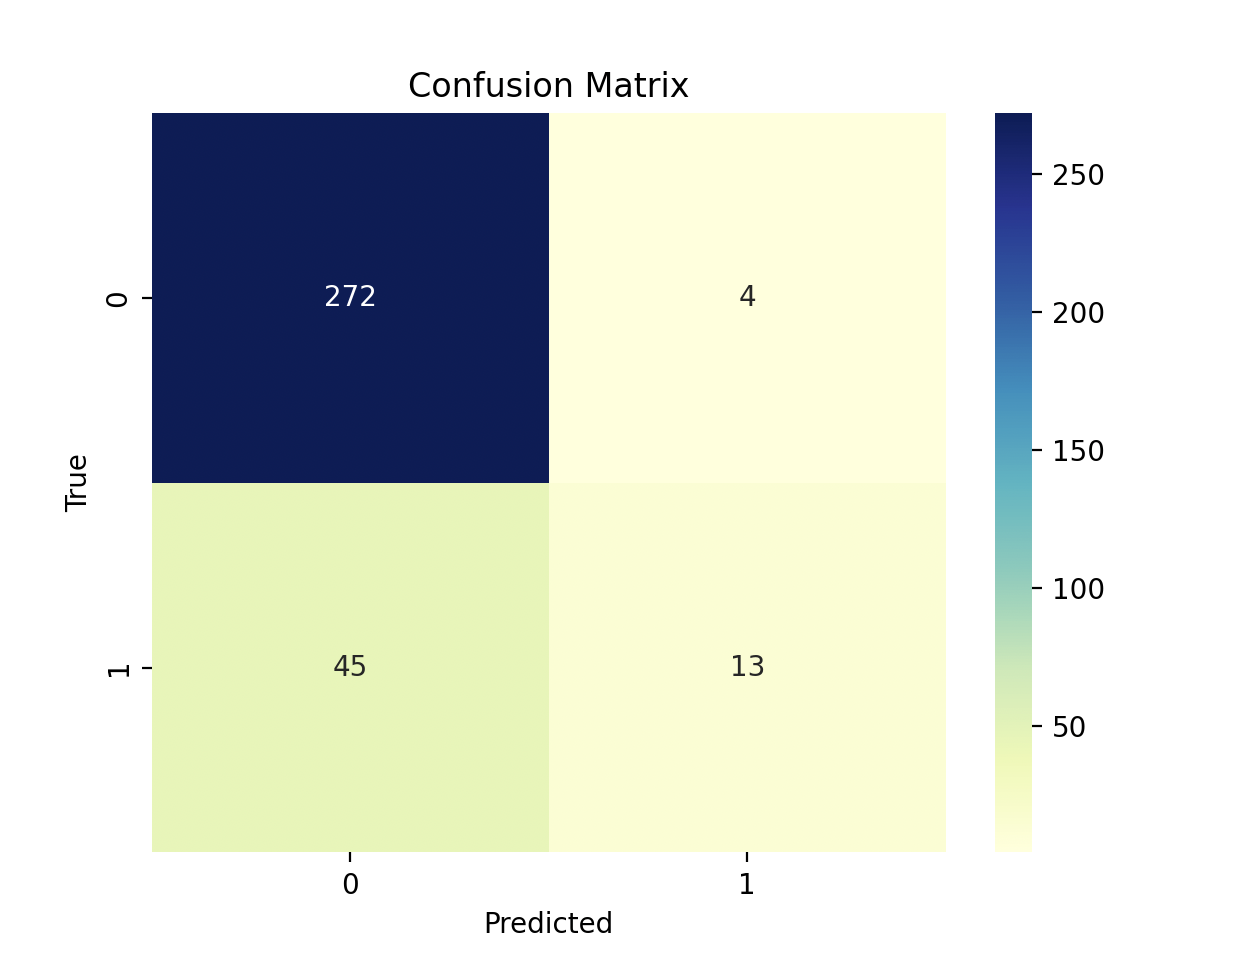
In this models case:

True Negatives (TN): 272 - The model predicted "No", and it's indeed "No".
False Positives (FP): 4 - The model predicted "Yes", but it's actually "No".
False Negatives (FN): 45 - The model predicted "No", but it's actually "Yes".
True Positives (TP): 13 - The model predicted "Yes", and it's indeed "Yes".
If we look at this, the model seems to be doing very well with negative cases (predicted No), but it's not performing well with the positive cases (predicted Yes) . I believe this is because the variables did not show a true link between good and bad credit. So overall what would boost the range of accuracy would be to find a way to decrease the amount of false negatives and increase true positives.



# Summary

The credit risk prediction model showed good overall performance with an accuracy ranging between 83% and 87%. However, the model struggled with correctly identifying positive cases, which in this context would likely be bad credit instances. This might be due to an imbalance in the data where the number of good credit examples significantly outweighs the bad ones, causing the model to be more biased towards predicting good credit instances.
To improve the model's performance, especially in identifying bad credit cases, several strategies could be implemented. Firstly, gathering more data, particularly instances of bad credit, could help the model better understand the patterns that are indicative of bad credit risk. If additional data collection is not feasible, synthetic data augmentation techniques such as the Synthetic Minority Over-sampling Technique (SMOTE) can be employed to balance the classes artificially.
Secondly, different machine learning models or ensemble techniques that are more robust against class imbalance could be tested. For instance, models such as Random Forest or algorithms such as XGBoost can perform better in imbalanced scenarios.
Thirdly, feature engineering could help improve model performance. This process might include deriving new features from existing ones or introducing new data sources to provide additional context or information that could help distinguish good and bad credit instances. Domain knowledge about factors influencing credit risk would be particularly valuable in this process.
Lastly, it could be beneficial to optimise for a specific performance metric other than accuracy. Precision, recall, or the F1 score could provide a more nuanced understanding of model performance. Particularly in credit risk scenarios, where false negatives (predicting good credit when it's actually bad) can have a significant financial impact, optimising for recall might be a strategic decision.
In conclusion, while the model shows promising performance, there are several avenues for potential improvement, particularly in better identifying bad credit cases. Through data augmentation, model selection, feature engineering, and metric optimisation, it's plausible that model performance could be significantly enhanced.


